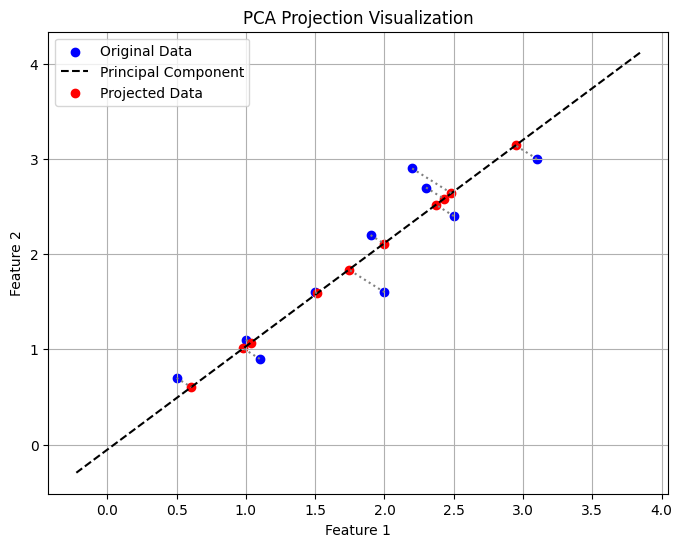

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset (2D)
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2.0, 1.6],
              [1.0, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

# Step 1: Mean Centering
mean_X = np.mean(X, axis=0)
X_centered = X - mean_X

# Step 2: Compute Covariance Matrix
cov_matrix = np.cov(X_centered.T)

# Step 3: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort Eigenvalues and Select Principal Component
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
principal_component = eigenvectors[:, sorted_indices[0]]  # First eigenvector

# Step 5: Project Data onto Principal Component
X_pca = X_centered @ principal_component  # 1D Projection

# Step 6: Reconstruct 2D points from 1D projection for visualization
X_reconstructed = np.outer(X_pca, principal_component) + mean_X

# ---- Plot the Original Data, Principal Component, and Projected Data ----
plt.figure(figsize=(8, 6))

# Scatter original data points
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Original Data')

# Draw principal component line
pc_line = np.array([mean_X - 3 * principal_component, mean_X + 3 * principal_component])
plt.plot(pc_line[:, 0], pc_line[:, 1], 'k--', label='Principal Component')

# Scatter projected points (onto principal component)
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], color='red', label='Projected Data')

# Connect original points to their projections
for i in range(len(X)):
    plt.plot([X[i, 0], X_reconstructed[i, 0]], [X[i, 1], X_reconstructed[i, 1]], 'gray', linestyle='dotted')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("PCA Projection Visualization")
plt.legend()
plt.grid()
plt.show()


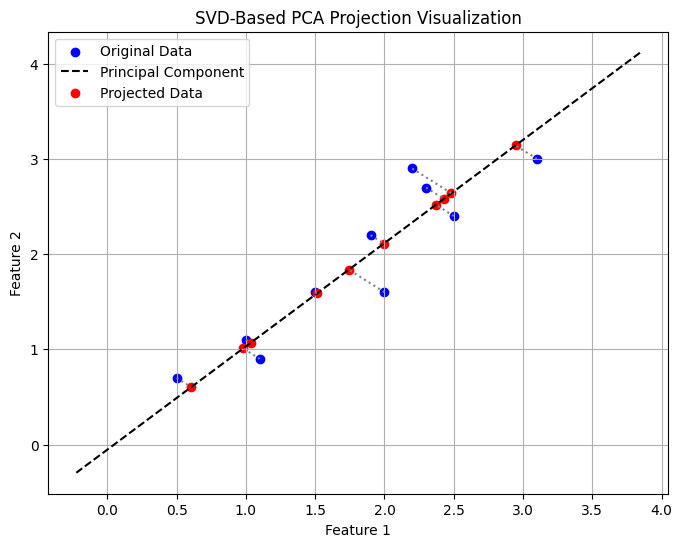

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset (2D)
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2.0, 1.6],
              [1.0, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

# Step 1: Mean Centering
mean_X = np.mean(X, axis=0)
X_centered = X - mean_X

# Step 2: Compute SVD
U, S, Vt = np.linalg.svd(X_centered)

# Principal component is the first row of Vt (V transposed)
principal_component = Vt[0]

# Step 3: Project Data onto Principal Component
X_pca = X_centered @ principal_component  # 1D Projection

# Step 4: Reconstruct 2D points from 1D projection for visualization
X_reconstructed = np.outer(X_pca, principal_component) + mean_X

# ---- Plot the Original Data, Principal Component, and Projected Data ----
plt.figure(figsize=(8, 6))

# Scatter original data points
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Original Data')

# Draw principal component line
pc_line = np.array([mean_X - 3 * principal_component, mean_X + 3 * principal_component])
plt.plot(pc_line[:, 0], pc_line[:, 1], 'k--', label='Principal Component')

# Scatter projected points (onto principal component)
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], color='red', label='Projected Data')

# Connect original points to their projections
for i in range(len(X)):
    plt.plot([X[i, 0], X_reconstructed[i, 0]], [X[i, 1], X_reconstructed[i, 1]], 'gray', linestyle='dotted')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVD-Based PCA Projection Visualization")
plt.legend()
plt.grid()
plt.show()
